## Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

In [180]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [181]:
image_files = [
    'coca_logo_1.png',
    'coca_logo_2.png',
    'coca_multi.png',
    'coca_retro_1.png',
    'coca_retro_2.png',
    'COCA-COLA-LOGO.jpg',
    'logo_1.png'
]

### Creo una funcion para mejorar el template

In [182]:
def convert_to_black_and_white(image, threshold=200):

    # Crear una máscara para los píxeles que no son blancos (mayores que el umbral)
    _, mask = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY_INV)

    # Crear una imagen en negro del mismo tamaño que la imagen original
    black_image = np.zeros_like(image)

    # Copiar los píxeles no blancos de la imagen original a la imagen en negro usando la máscara
    black_image[mask != 0] = 255
    
    # Invierto colores para que los colores originales grises pasen a negro
    return 255 - black_image

### Creo ambos templates en negro con fondo blanco y viceversa

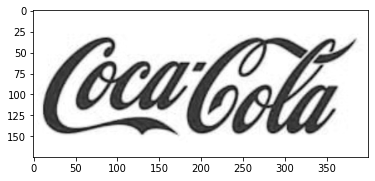

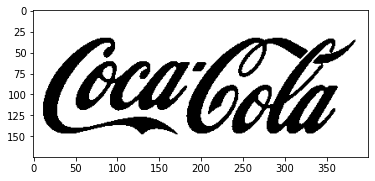

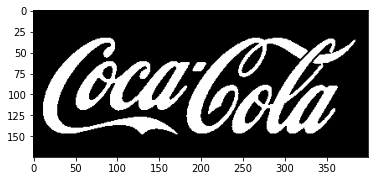

In [183]:
template = cv2.imread('./template/pattern.png', cv2.IMREAD_GRAYSCALE)
template_bnw = convert_to_black_and_white(template)
template_wnb = 255 - template_bnw

plt.figure()
plt.imshow(template, cmap='gray')
plt.show()
plt.figure()
plt.imshow(template_bnw, cmap='gray')
plt.show()
plt.figure()
plt.imshow(template_wnb, cmap='gray')
plt.show()


### Evaluo que metodo usar de template matching

In [184]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

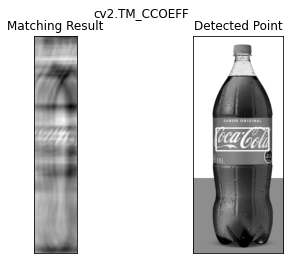

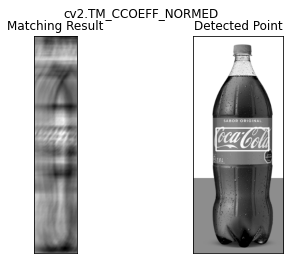

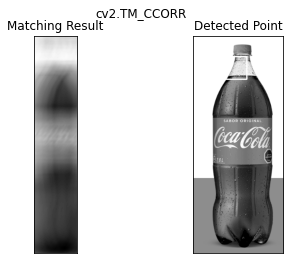

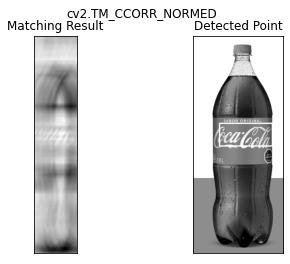

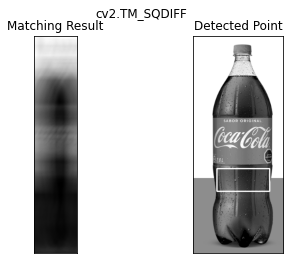

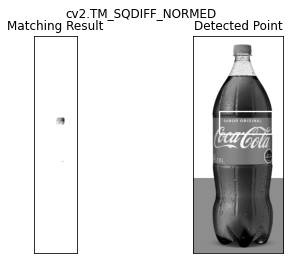

In [185]:
original_img = cv2.imread('./images/' + image_files[0], cv2.IMREAD_GRAYSCALE)
logo_template = template_wnb
scale_factor = 0.3
template = cv2.resize(logo_template, None, fx=scale_factor, fy=scale_factor)
w, h = template.shape[::-1]
image_height, image_width = original_img.shape[:2]

for meth in methods:
   img = original_img.copy()
   method = eval(meth)
   res = cv2.matchTemplate(img, template, method)
   min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
   if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
      top_left = min_loc
   else:
      top_left = max_loc
   bottom_right = (top_left[0] + w, top_left[1] + h)
   img_with_rectangle = cv2.rectangle(img, top_left, bottom_right, 255, 2)

   plt.subplot(121),plt.imshow(res, cmap = 'gray')
   plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
   plt.subplot(122),plt.imshow(img_with_rectangle, cmap = 'gray')
   plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
   plt.suptitle(meth)
   plt.show()

Se elije el metodo TM_CCOEFF_NORMED porque visualmente con el size elegido encuentra bien el logo

### Se procede a buscar las escalas manualmente para poder encontrar en cada imagen el sizing acorde

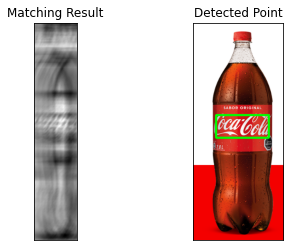

In [186]:
image = image_files[0]
original_img = cv2.imread('./images/' + image, cv2.IMREAD_GRAYSCALE)
original_img_rgb = cv2.cvtColor(cv2.imread('./images/' + image), cv2.COLOR_BGR2RGB)
logo_template = template_wnb
scale_factor = 0.3
template = cv2.resize(logo_template, None, fx=scale_factor, fy=scale_factor)
w, h = template.shape[::-1]
image_height, image_width = original_img.shape[:2]

meth = methods[1]

img = original_img.copy()
method = eval(meth)
res = cv2.matchTemplate(img, template, method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
color = (0, 255, 0)
img_with_rectangle = cv2.rectangle(original_img_rgb, top_left, bottom_right, color, 3)

plt.subplot(121),plt.imshow(res, cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_with_rectangle, cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

Evaluando imagen por imagen los resultados son los siguientes

In [187]:
template_sizing = [0.3, 0.47, 0.23, 1.2, 0.4, 3, 0.65]
template_b_or_w = [True, True, True ,False ,True ,True ,True]

## 1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos

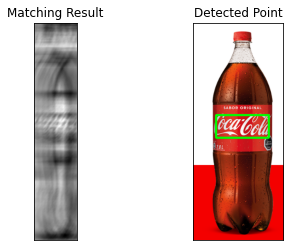

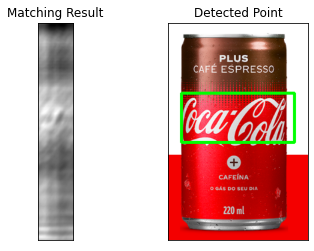

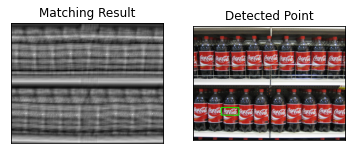

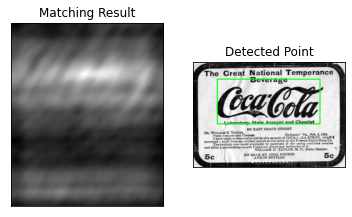

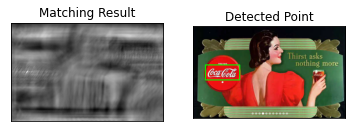

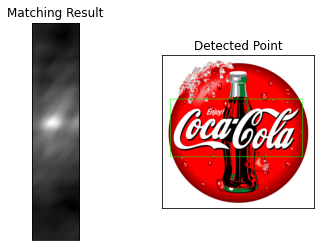

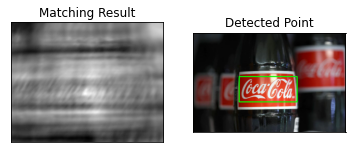

In [188]:
for idx, image in enumerate(image_files):
    original_img = cv2.imread('./images/' + image, cv2.IMREAD_GRAYSCALE)
    original_img_rgb = cv2.cvtColor(cv2.imread('./images/' + image), cv2.COLOR_BGR2RGB)
    logo_template = template_wnb if template_b_or_w[idx] else template_bnw
    scale_factor = template_sizing[idx]
    template = cv2.resize(logo_template, None, fx=scale_factor, fy=scale_factor)
    w, h = template.shape[::-1]
    image_height, image_width = original_img.shape[:2]

    meth = methods[1]

    img = original_img.copy()
    method = eval(meth)
    res = cv2.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    color = (0, 255, 0)
    img_with_rectangle = cv2.rectangle(original_img_rgb, top_left, bottom_right, color, 3)

    plt.subplot(121),plt.imshow(res, cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_with_rectangle, cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.show()

## 2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1

coca_multi.png
scale factor: 0.23


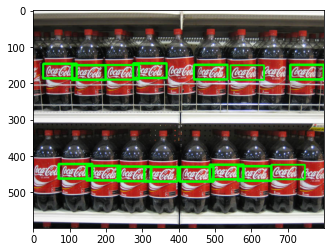

In [189]:
n = 2
image = image_files[n]
print(image)
original_img = cv2.imread('./images/' + image, cv2.IMREAD_GRAYSCALE)
original_img_rgb = cv2.cvtColor(cv2.imread('./images/' + image), cv2.COLOR_BGR2RGB)
logo_template = template_wnb
scale_factor = 0.23
print('scale factor:', scale_factor)
template = cv2.resize(logo_template, None, fx=scale_factor, fy=scale_factor)
w, h = template.shape[::-1]
image_height, image_width = original_img.shape[:2]

meth = methods[1]

img = original_img.copy()
method = eval(meth)
res = cv2.matchTemplate(img, template, method)

threshold = 0.4
loc = np.where(res >= threshold)

img_with_rectangles = original_img_rgb.copy()

for pt in zip(*loc[::-1]):
    top_left = pt
    bottom_right = (top_left[0] + w, top_left[1] + h)
    color = (0, 255, 0)
    cv2.rectangle(img_with_rectangles, top_left, bottom_right, color, 3)

plt.figure()
plt.imshow(img_with_rectangles)
plt.show()

## 3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.

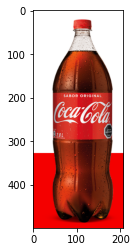

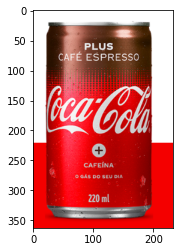

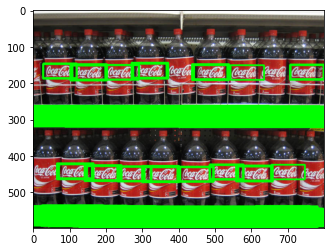

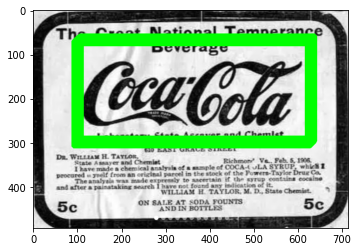

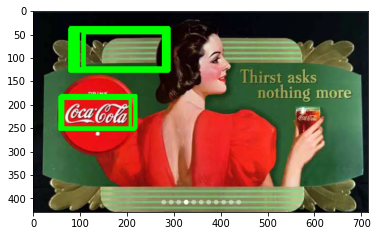

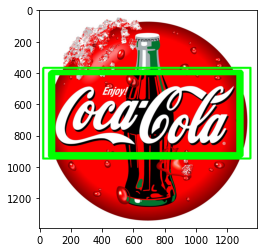

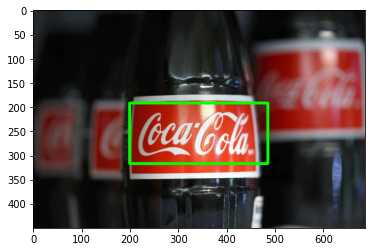

In [190]:
for idx, image in enumerate(image_files):
    original_img = cv2.imread('./images/' + image, cv2.IMREAD_GRAYSCALE)
    original_img_rgb = cv2.cvtColor(cv2.imread('./images/' + image), cv2.COLOR_BGR2RGB)
    logo_template = template_wnb if template_b_or_w[idx] else template_bnw

    image_height, image_width = original_img.shape[:2]

    meth = methods[1]

    img_with_rectangles = original_img_rgb.copy()
    for iter_scale in np.arange(0.5, 1.5, 0.1):
        scale_factor = template_sizing[idx]*iter_scale
        scaled_template = cv2.resize(logo_template, None, fx=scale_factor, fy=scale_factor)
        w, h = scaled_template.shape[::-1]
        
        if w < image_width:
            img = original_img.copy()

            res = cv2.matchTemplate(img, scaled_template, method)

            threshold = 0.4
            loc = np.where(res >= threshold)


            for pt in zip(*loc[::-1]):
                top_left = pt
                bottom_right = (top_left[0] + w, top_left[1] + h)
                color = (0, 255, 0)
                cv2.rectangle(img_with_rectangles, top_left, bottom_right, color, 3)

    plt.figure()
    plt.imshow(img_with_rectangles)
    plt.show()

Se realiza un intervalo de tamaño sobre el template para realizar una multiple busqueda del logotipo en las imagenes.

Se varia el threshold pero no se logra llegar a un punto de equilibrio para el cual el resultado sea nitido y no haya falsos positivos.

Se podría implementar algun tipo de blur para que el logotipo se busque en las imagenes desenfocadas.